<a href="https://colab.research.google.com/github/Ashu-sarkar/CodSoft/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# credit-card-fraud-detection

Use the "Run" button to execute the code.

#**A Project on Credit Card Fraud Detetction.**




Importing all the necessary Libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Importing the dataset to Pandas DataFrame

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

download_url = ("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

od.download(download_url)

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [5]:
cc_data = pd.read_csv("/content/creditcardfraud/creditcard.csv")

In [6]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
cc_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#Checking the number of missing values in each Column:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#Distribution of Legit Transaction and Fradulent Trasactions
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

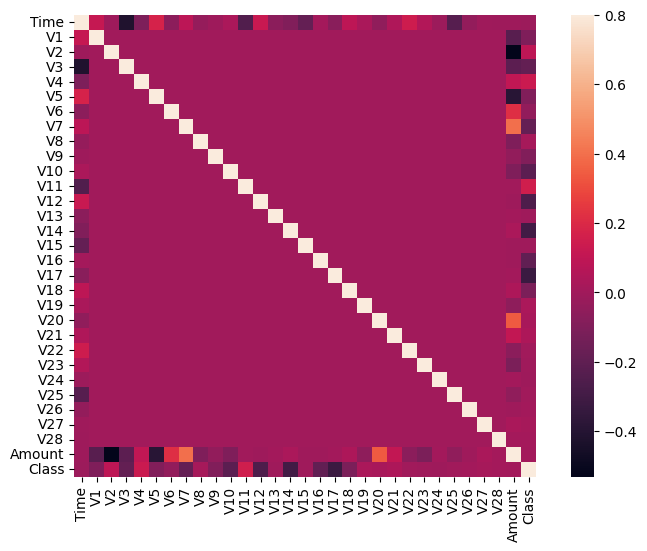

In [34]:
# Correlation matrix
corrmat = cc_data.corr()
fig = plt.figure(figsize = (9, 6))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


This dataset is highly Unbalanced

1.   Fradulent Transactions
2.   Normal Trascations

In [11]:
#Sperating the Data for Analysis
legit = cc_data[cc_data.Class == 0]
fraud = cc_data[cc_data.Class == 1]

<Axes: >

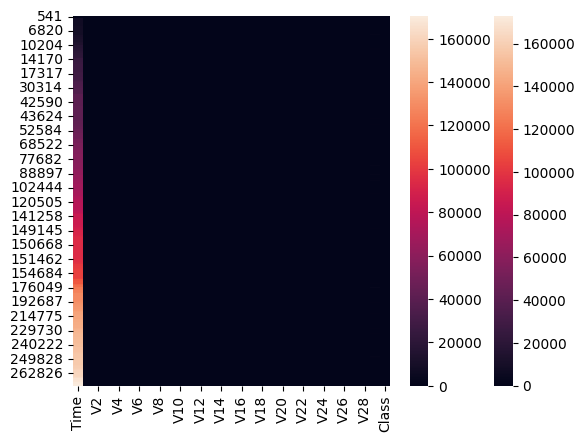

In [12]:
sns.heatmap(legit)
sns.heatmap(fraud)

In [13]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


In [14]:
#Statistical measure of the Data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
#Compare the values of both Transactions
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Build a sample dataset containing similiar distribution of Normal transactions and Fradulent Transactions

In [17]:
legit_sample = legit.sample(n=492)

In [18]:
#Concatenating two Dataframes
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
160831,113671.0,1.891091,0.321226,-0.142903,4.058212,-0.048428,0.166566,-0.183301,0.022226,-0.223479,...,0.081503,0.523432,0.084218,0.049362,0.097920,0.132655,-0.003539,-0.047447,0.00,0
31178,36244.0,1.037688,-0.120858,1.197892,1.052201,-0.510433,0.952291,-0.780355,0.487848,0.479981,...,0.083504,0.421648,0.052185,-0.283246,0.209144,-0.372108,0.097034,0.021404,6.53,0
209670,137657.0,-0.237536,-0.467748,1.877714,0.148058,-0.989058,0.243729,-0.029263,-0.482191,-0.282292,...,-0.461390,-0.260506,-0.041754,-0.096285,-1.026586,0.194885,-0.254796,-0.241249,108.90,0
18742,29732.0,-1.287550,1.560949,0.815638,-0.658194,0.842067,1.009760,0.056437,-1.320762,-0.476141,...,1.277561,-1.029552,0.016500,-1.356345,-0.031254,0.179531,0.508610,0.239313,8.28,0
274336,165962.0,0.112532,1.016847,-0.224282,-0.429212,0.635245,-1.103409,0.971615,-0.118400,-0.017732,...,-0.314931,-0.784310,0.163450,1.031271,-0.495266,0.085035,0.219351,0.088245,6.25,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92700.900407,0.061063,-0.009845,0.051583,-0.018466,0.105434,0.031773,0.040811,0.024379,0.019681,...,0.021473,-0.000778,0.055544,-0.011752,0.025539,0.009636,0.001173,0.012345,-0.002177,82.936138
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


##Splitting the data into Features & Targets

In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [24]:
print(Y)

160831    0
31178     0
209670    0
18742     0
274336    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


##Split the data into Training & Testing data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


##Model Training

In [27]:
model = LogisticRegression()

In [28]:
#training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

##Model Evaluation

In [29]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy on Training Data: ' ,training_data_accuracy)

Accuracy on Training Data:  0.9301143583227446


In [31]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print("Accuracy score on Test Data: ", test_data_accuracy )

Accuracy score on Test Data:  0.883248730964467
